<a href="https://colab.research.google.com/github/King-Bowie/projeto_olimpiadas/blob/main/Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Olá a todes,
<h3>Neste projeto estamos analisando e explorando dados das olimpíadas de 1896 até 2016<h3>

<h5> Estes dados estão disponíveis em:</h5>
<a href="https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results"> Kaggle - 120 years of Olympic history: athletes and results </a>

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

atletas = pd.read_csv('athlete_events.csv')
atletas

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [2]:
atletas.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [3]:
atletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


###Quantos dados possuimos?

In [4]:
print(f'No dataset de atletas temos {atletas.shape[0]} registros e {atletas.shape[1]} tipos de variáveis de classificação')

No dataset de atletas temos 271116 registros e 15 tipos de variáveis de classificação


###Quantos registro existem em cada ano?

In [5]:
atletas['Year'].value_counts()

1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

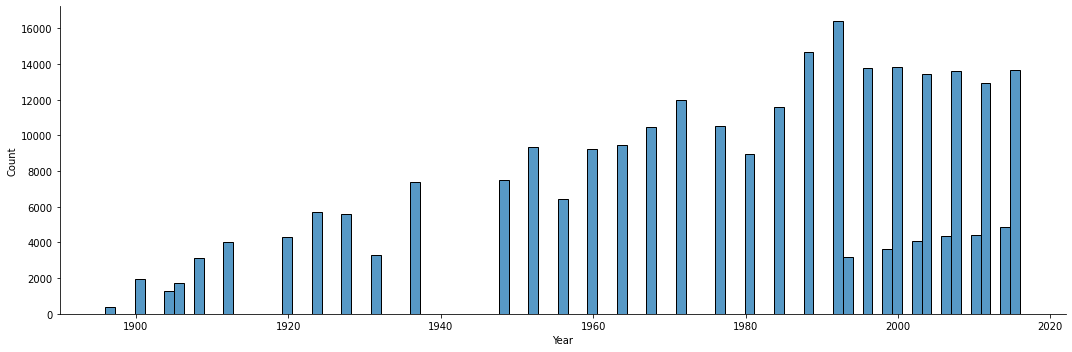

In [6]:
sns.displot(data = atletas, x="Year", kind='hist',aspect=3)

Neste gráfico podemos ver que as edições de 1916, 1940 e 1944 foram canceladas por causa das duas grandes guerras mundiais.

Para saber mais:
<href>https://www.olimpiadatododia.com.br/curiosidades-olimpicas/252485-olimpiadas-canceladas-2/</href>

###Qua é o total de participação por genero?

In [7]:
atletas['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

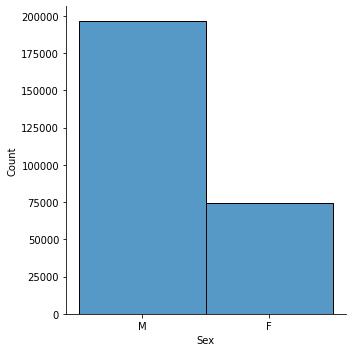

In [8]:
sns.displot(data=atletas, x="Sex", kind='hist')

###Quantos pessoas participaram em cada edição?

In [9]:
quantidade_de_jogos = atletas.Games.unique().shape
quantidade_de_jogos

(51,)

In [16]:
total_por_edicao =  atletas.Games.value_counts()
total_por_edicao

2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8119
1964 Summer     7702
1980 Summer     7191
1936 Summer     6506
1948 Summer     6405
1924 Summer     5233
1956 Summer     5127
1928 Summer     4992
2014 Winter     4891
2010 Winter     4402
2006 Winter     4382
1920 Summer     4292
2002 Winter     4109
1912 Summer     4040
1998 Winter     3605
1992 Winter     3436
1994 Winter     3160
1908 Summer     3101
1932 Summer     2969
1988 Winter     2639
1984 Winter     2134
1900 Summer     1936
1968 Winter     1891
1976 Winter     1861
1964 Winter     1778
1980 Winter     1746
1906 Summer     1733
1972 Winter     1655
1956 Winter     1307
1904 Summer     1301
1960 Winter     1116
1952 Winter     1088
1948 Winter     1075
1936 Winter      895
1928 Winter  

In [17]:
total_por_edicao = pd.Series(total_por_edicao,index = total_por_edicao.index )
total_por_edicao.columns = ['ano','total']
total_por_edicao

2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8119
1964 Summer     7702
1980 Summer     7191
1936 Summer     6506
1948 Summer     6405
1924 Summer     5233
1956 Summer     5127
1928 Summer     4992
2014 Winter     4891
2010 Winter     4402
2006 Winter     4382
1920 Summer     4292
2002 Winter     4109
1912 Summer     4040
1998 Winter     3605
1992 Winter     3436
1994 Winter     3160
1908 Summer     3101
1932 Summer     2969
1988 Winter     2639
1984 Winter     2134
1900 Summer     1936
1968 Winter     1891
1976 Winter     1861
1964 Winter     1778
1980 Winter     1746
1906 Summer     1733
1972 Winter     1655
1956 Winter     1307
1904 Summer     1301
1960 Winter     1116
1952 Winter     1088
1948 Winter     1075
1936 Winter      895
1928 Winter  

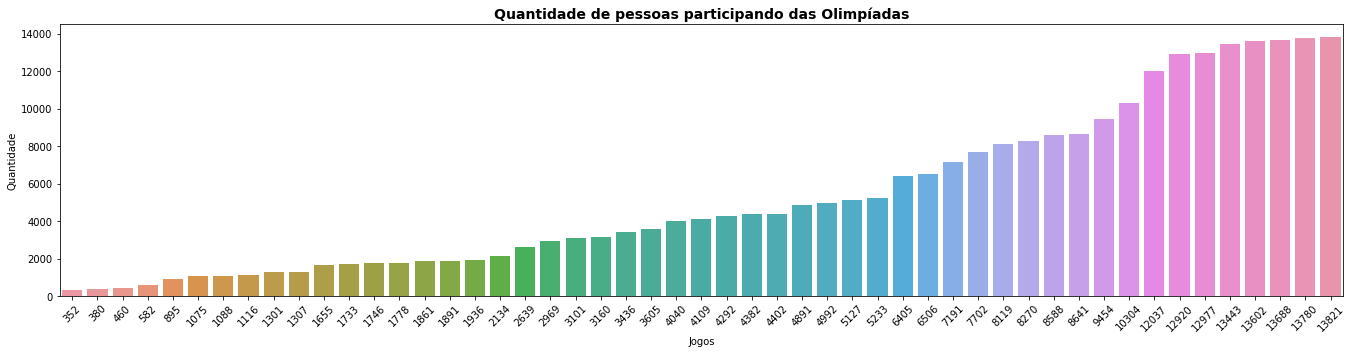

In [40]:
plt.figure(figsize=(23,5))
sns.barplot(data= total_por_edicao,
            x= total_por_edicao.index,
            y=atletas.Games.value_counts())
plt.title("Quantidade de pessoas participando das Olimpíadas", fontsize=14, weight='bold')
plt.ylabel("Quantidade")
plt.xlabel('Jogos')
plt.xticks(rotation=45)
plt.show()